In [1]:
import tensorflow as tf

/home/yashwant/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/yashwant/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/yashwant/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/yashwant/anaconda3/lib/python3.6/site-packages/tensorflow/python/frame

In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
(x_train,y_train),(x_test,y_test) =  mnist.load_data()

In [4]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255
x_test = x_test/255
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

In [6]:
x_train.shape,x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [7]:
from keras.utils import to_categorical
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

## Sequential Model

### syntax 1

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D ,Dense,Flatten,Dropout

model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(5,5),activation='relu',input_shape = (x_train.shape[1:])))
model.add(Conv2D(filters=32,kernel_size=(5,5),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate = 0.25))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))

### Syntax 2

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D ,Dense,Flatten,Dropout

model = Sequential([
Conv2D(filters=32,kernel_size=(5,5),activation='relu',input_shape = (x_train.shape[1:])),
Conv2D(filters=32,kernel_size=(5,5),activation='relu'),
MaxPool2D(pool_size=(2,2)),
Dropout(rate = 0.25),

Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
MaxPool2D(pool_size=(2,2)),
Dropout(rate=0.25),
Flatten(),
Dense(256,activation='relu'),
Dense(10,activation='softmax')
])

### Syntax 3

In [10]:
from keras.models import Model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, Input

inputs = Input(shape=x_train.shape[1:])

x = Conv2D(filters=32, kernel_size=(5,5), activation='relu')(inputs)
x = Conv2D(filters=32, kernel_size=(5,5), activation='relu')(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Dropout(rate=0.25)(x)

x = Conv2D(filters=64, kernel_size=(3,3), activation='relu')(x)
x = Conv2D(filters=64, kernel_size=(3,3), activation='relu')(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Dropout(rate=0.25)(x)

x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(rate=0.5)(x)
predictions = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=predictions)

In [11]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [12]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

## Model Training

In [13]:
epochs = 3
batch_size = 32

history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size), epochs=epochs,
                              validation_data=(x_test, y_test), steps_per_epoch=x_train.shape[0]//batch_size)


Epoch 1/3
1875/1875 [==============================] - 124s 66ms/step - loss: 0.3435 - accuracy: 0.8919 - val_loss: 0.0296 - val_accuracy: 0.9903
Epoch 2/3
1875/1875 [==============================] - 128s 68ms/step - loss: 0.1179 - accuracy: 0.9660 - val_loss: 0.0279 - val_accuracy: 0.9902
Epoch 3/3
1875/1875 [==============================] - 129s 69ms/step - loss: 0.0892 - accuracy: 0.9746 - val_loss: 0.0268 - val_accuracy: 0.9924


## Analyzing results

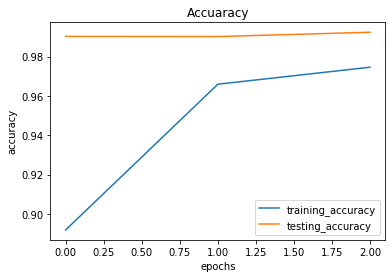

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='training_accuracy')
plt.plot(history.history['val_accuracy'],label='testing_accuracy')
plt.title('Accuaracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

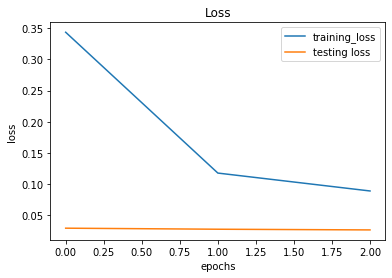

In [17]:
plt.plot(history.history['loss'],label='training_loss')
plt.plot(history.history['val_loss'],label='testing loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()